# CS - 533 Introduction to Data Science
## Technical Blog Assignment
### Author - Atharva Pargaonkar

# Understanding the Data

### In this project, we will be exploring the CIFAR-10 image dataset and training a Convolutional Neural Network using this data.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images.

The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes in the dataset are airplane, automobile, bird, cat, deer, frog, dog, horse, ship and truck.

# Dataset Exploration

## Importing necessary Libraries

In [1]:
# For Numerical Analysis
import numpy as np
import pandas as pd

# For Visual Analysis
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Importing data

In [2]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## Data Analysis and Visualization

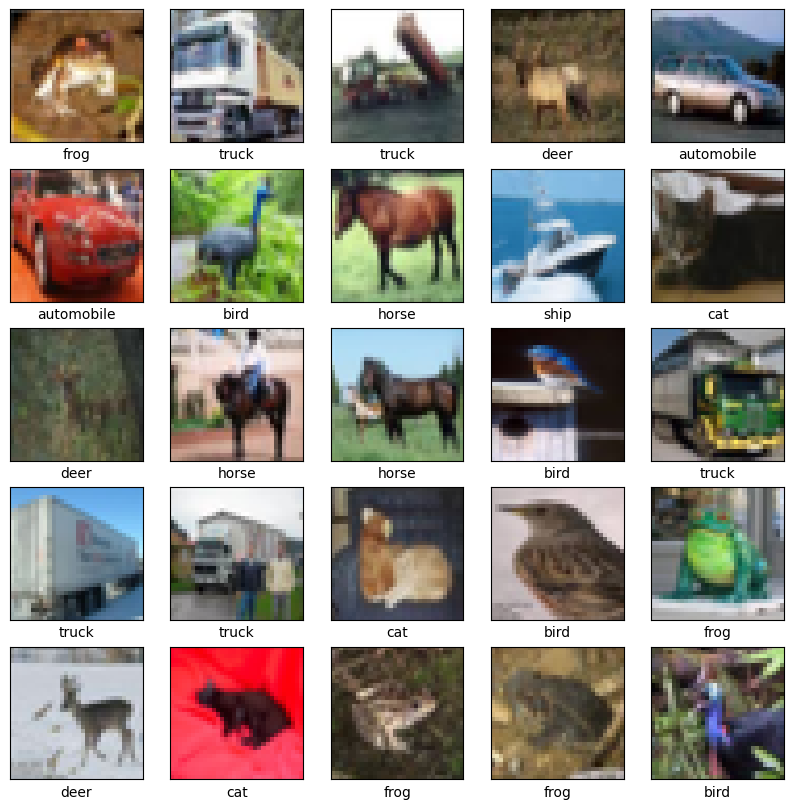

In [3]:
# Mapping class labels to their corresponding category names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display some sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [4]:
# Calculate the mean and standard deviation of pixel values in the training set
pixel_mean = np.mean(x_train, axis=(0, 1, 2))
pixel_std = np.std(x_train, axis=(0, 1, 2))

# Print the results
print(f"Mean of pixel values: {pixel_mean}")
print(f"Standard deviation of pixel values: {pixel_std}")


Mean of pixel values: [125.30691805 122.95039414 113.86538318]
Standard deviation of pixel values: [62.99321928 62.08870764 66.70489964]


In [5]:
# Get the total number of samples
total_samples = len(y_train)

# Calculate the number of classes
num_classes = len(np.unique(y_train))

# Count the number of samples in each class
class_count = {class_names[i]: np.count_nonzero(y_train == i) for i in range(num_classes)}

# Print the results
print(f"Total number of samples: {total_samples}")
print(f"Number of classes: {num_classes}")
print("Class counts:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count}")


Total number of samples: 50000
Number of classes: 10
Class counts:
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


# Data Preprocessing

In [6]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


The pixel values are normalized to the range [0, 1] to facilitate model training. The labels are also converted to categorical one-hot encoding for multi-class classification. Additionally, the training set is split into training and validation sets, allowing you to monitor the model's performance during training.

In [7]:
# Print information about the preprocessed data
print("Preprocessed Data Information:")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_valid.shape}")
print(f"Validation labels shape: {y_valid.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


Preprocessed Data Information:
Training data shape: (45000, 32, 32, 3)
Training labels shape: (45000, 10)
Validation data shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


# Training of CNN

## Model Construction

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output before feeding it into the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## Model Training

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"\nTest accuracy: {test_accuracy}")

Epoch 1/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6234 - accuracy: 0.7602 - val_loss: 1.0527 - val_accuracy: 0.6960
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6093 - accuracy: 0.7649 - val_loss: 1.0678 - val_accuracy: 0.7016
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6129 - accuracy: 0.7618 - val_loss: 1.0430 - val_accuracy: 0.7016
Epoch 4/100
1407/1407 [==============================] - 6s 5ms/step - loss: 0.6152 - accuracy: 0.7631 - val_loss: 1.0420 - val_accuracy: 0.6938
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6037 - accuracy: 0.7668 - val_loss: 1.0829 - val_accuracy: 0.6970
Epoch 6/100
1407/1407 [==============================] - 6s 5ms/step - loss: 0.6024 - accuracy: 0.7661 - val_loss: 1.0864 - val_accuracy: 0.6996
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5941 - accuracy: 0.7688 - val_loss: 1.0998 - val_ac

Test accuracy: 68.01%

## Visualization of Accuracy and Loss

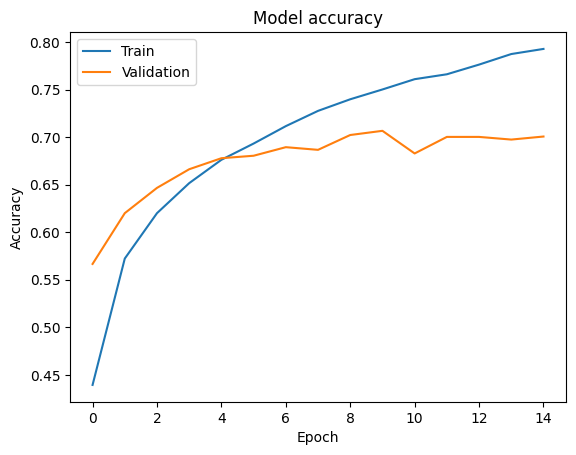

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


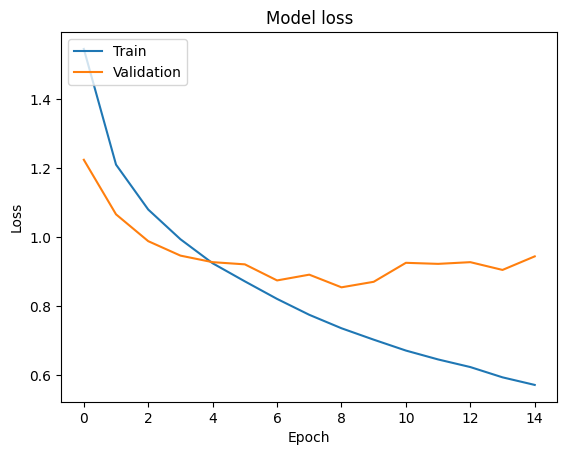

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the model in your Google Drive
model_save_path = '/content/drive/My Drive/Colab Notebooks/cifar10_cnn_model.h5'

# Save the model to your Google Drive
model.save(model_save_path)
print("Model saved to Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive.


In [11]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from google.colab import drive
from tensorflow.keras.models import load_model

# Define the path to the saved model in your Google Drive
model_load_path = '/content/drive/My Drive/Colab Notebooks/cifar10_cnn_model.h5'

# Load the saved model from your Google Drive
loaded_model = load_model(model_load_path)

# Print the loaded model summary
print("Loaded Model Summary:")
loaded_model.summary()

Loaded Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (No

In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = loaded_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
[[731  15  39  22  10   4  15  18 103  43]
 [ 23 762   6  10   5   3  14   9  34 134]
 [ 80   5 502  75 144  51  65  49  17  12]
 [ 11   6  72 471 106 140 110  49  17  18]
 [ 25   2  63  40 684  19  69  84  12   2]
 [ 13   2  69 222  65 498  43  75   7   6]
 [  3   4  44  63  90   9 764   8   6   9]
 [ 15   0  33  41  98  55  20 716   6  16]
 [ 77  34  15  16   8   8  11   8 793  30]
 [ 22  85   8  19  12   4  13  30  38 769]]


In [16]:
# Generate classification report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.83      0.76      0.80      1000
           2       0.59      0.50      0.54      1000
           3       0.48      0.47      0.48      1000
           4       0.56      0.68      0.62      1000
           5       0.63      0.50      0.56      1000
           6       0.68      0.76      0.72      1000
           7       0.68      0.72      0.70      1000
           8       0.77      0.79      0.78      1000
           9       0.74      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



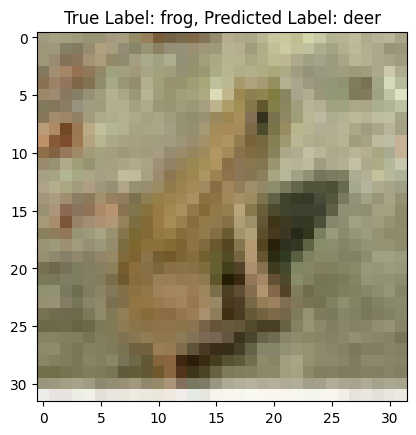

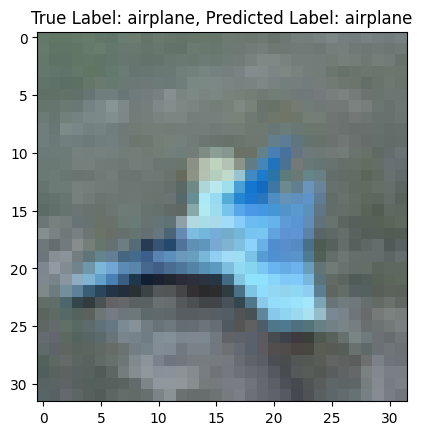

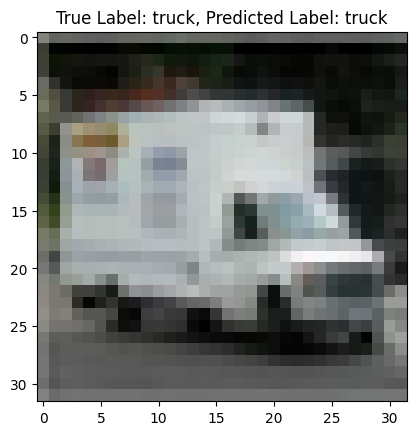

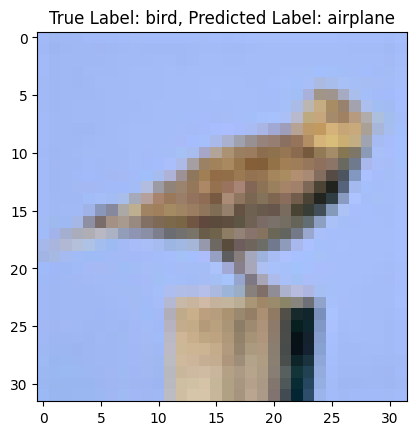

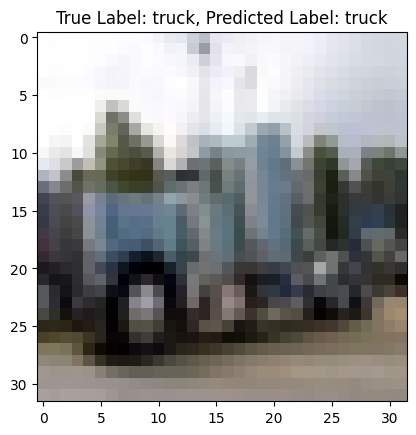

In [17]:
import random
import matplotlib.pyplot as plt

# Randomly select a few examples from the test set
sample_indices = random.sample(range(len(x_test)), 5)

for index in sample_indices:
    # Display the image
    plt.imshow(x_test[index])
    plt.title(f"True Label: {class_names[y_true[index]]}, Predicted Label: {class_names[y_pred_classes[index]]}")
    plt.show()

## Hyperparameter Tuning

Changed the optimizer to SGD and loss function to Mean Squared Error.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np

# Assuming y_train is one-hot encoded
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a specific optimizer and loss function
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/100
1407/1407 [==============================] - 9s 5ms/step - loss: 0.0898 - accuracy: 0.1276 - val_loss: 0.0892 - val_accuracy: 0.1730
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0882 - accuracy: 0.1780 - val_loss: 0.0864 - val_accuracy: 0.2124
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0861 - accuracy: 0.2205 - val_loss: 0.0840 - val_accuracy: 0.2648
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0844 - accuracy: 0.2566 - val_loss: 0.0820 - val_accuracy: 0.3126
Epoch 5/100
1407/1407 [==============================] - 6s 5ms/step - loss: 0.0827 - accuracy: 0.2901 - val_loss: 0.0797 - val_accuracy: 0.3478
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0809 - accuracy: 0.3122 - val_loss: 0.0775 - val_accuracy: 0.3666
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0788 - accuracy: 0.3411 - val_loss: 0.0751 - val_a

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0426 - accuracy: 0.6939 - 647ms/epoch - 2ms/step


Here we got the Test Accuracy = 69.39% which is slightly more than what we got for training the original model with Adam optimizer and Loss as categorical crossentropy.

## Visualization of Accuracy and Loss

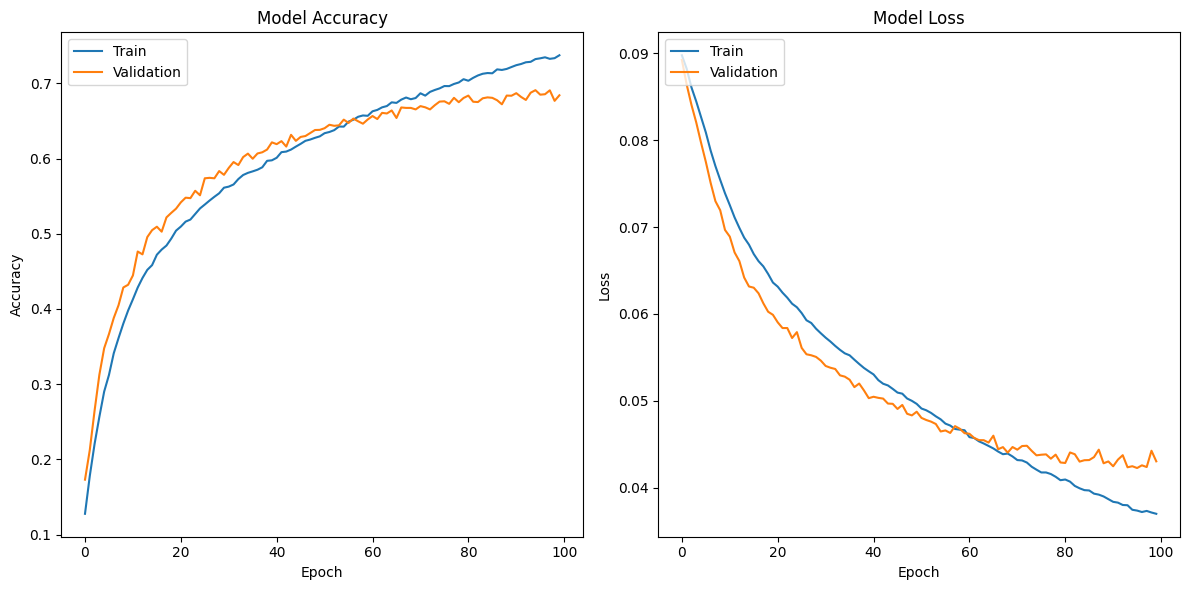

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


## Conclusion
In this tutorial we studied the CIFAR-10 Image dataset which has 10 classes. We build a two Convolutional Neural Network for the CIFAR-10 using different optimizers and Loss functions. Graphical Analysis is done by observing the plots of Accuracy and Loss over no. of epochs (100) for both the models.

# ---------------------------------- END ----------------------------------